# Entri Elevate : Data Science & Machine Learning Final Project
------------------------------------------------------------

DATASET : Student Depression Dataset

Supervised Learning - Classification

Link : https://www.openml.org/search?type=data&sort=date&status=active&qualities.NumberOfInstances=between_10000_100000&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=gte_-1&id=46753
https://www.kaggle.com/datasets/hopesb/student-depression-dataset/discussion?sort=hotness

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#CLASSIFICATION Imports :
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv('StudentDepressionDataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# Data Preprocessing
--------------------
- Cleaning the Dataset
- Handling Missing Values
- Outliers

In [3]:
print("Dataset Shape: ",df.shape)
print("Dataset Size: ",df.size)

Dataset Shape:  (27901, 18)
Dataset Size:  502218


In [4]:
# Basic Information of Dataset.
print(df.info())
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27898.00,27901.00
mean,70442.15,25.82,3.14,0.00,7.66,2.94,0.00,7.16,3.14,0.59
std,40641.18,4.91,1.38,0.04,1.47,1.36,0.04,3.71,1.44,0.49
min,2.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,35039.00,21.00,2.00,0.00,6.29,2.00,0.00,4.00,2.00,0.00
50%,70684.00,25.00,3.00,0.00,7.77,3.00,0.00,8.00,3.00,1.00
75%,105818.00,30.00,4.00,0.00,8.92,4.00,0.00,10.00,4.00,1.00
max,140699.00,59.00,5.00,5.00,10.00,5.00,4.00,12.00,5.00,1.00


In [5]:
# Check for Duplicates
print("\nNumber of duplicate rows in the dataset:")
print(df.duplicated().sum())


Number of duplicate rows in the dataset:
0


In [6]:
# Check for Null Values
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
# Here Financial Stress having 3 Null Values.
print(df['Financial Stress'].max())
print(df['Financial Stress'].min())

# Financial Stress feature has max of 5 and min of 3, so we can set median value for all 3 Null cases.
df['Financial Stress']=df['Financial Stress'].fillna(df['Financial Stress'].median())

5.0
1.0


In [8]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
# Apply Label Encoding - Convert categorical features to numerical
label_encoder=LabelEncoder()
for column in ['Gender','City', 'Profession', 'Sleep Duration', 'Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
# Review the dataset after Label Encoding
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
5,33,1,29.0,39,11,2.0,0.0,5.70,3.0,0.0,2,0,27,0,4.0,1.0,0,0
6,52,1,30.0,46,11,3.0,0.0,9.54,4.0,0.0,1,0,10,0,1.0,2.0,0,0
7,56,0,30.0,6,11,2.0,0.0,8.04,4.0,0.0,2,3,11,0,0.0,1.0,1,0
8,59,1,28.0,33,11,3.0,0.0,9.79,1.0,0.0,1,1,2,1,12.0,3.0,0,1
9,62,1,31.0,37,11,2.0,0.0,8.38,3.0,0.0,2,1,12,1,2.0,5.0,0,1


Outliers
--------

Q1 : 6.29
Q3 : 8.92
IQR :  2.63
   id  Gender   Age  City  Profession  Academic Pressure  Work Pressure  CGPA  \
0   2       1  33.0    51          11                5.0            0.0  8.97   
1   8       0  24.0     3          11                2.0            0.0  5.90   
2  26       1  31.0    44          11                3.0            0.0  7.03   
3  30       0  28.0    49          11                3.0            0.0  5.59   
4  32       0  25.0    16          11                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 2.0               0.0               0               0   
1                 5.0               0.0               0               1   
2                 5.0               0.0               2               0   
3                 2.0               0.0               1               1   
4                 3.0               0.0               0               1   

   Degree  Have you ever had s

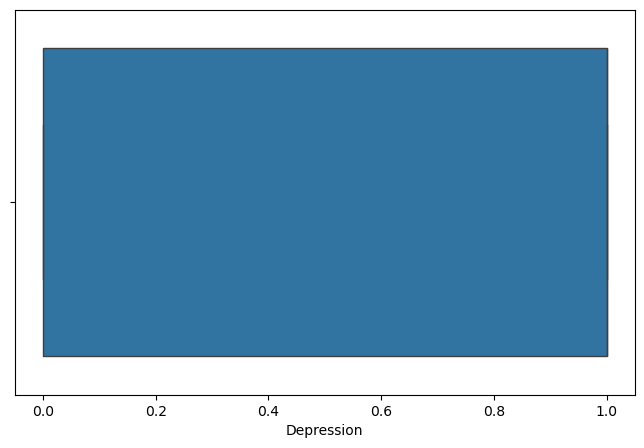

In [11]:
#Interquartile Range IQR
Q1=df['CGPA'].quantile(.25)
Q3=df['CGPA'].quantile(.75)
IQR=Q3-Q1
print('Q1 :', Q1)
print('Q3 :', Q3)
print('IQR : ',IQR)

lower_bound=Q1-1.5*IQR #1.5 is choosen Normal distribution
upper_bound=Q3+1.5*IQR

outliers=df[(df['Depression']<lower_bound) | (df['Depression']>upper_bound)]
print(outliers.head())

#Ploting Graph
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Depression'])
plt.show()

In [12]:
import scipy.stats as stats
# contingency table
ct1=pd.crosstab(df['Depression'],df['Sleep Duration'])
ct2=pd.crosstab(df['Depression'],df['Academic Pressure'])
ct3=pd.crosstab(df['Depression'],df['Work Pressure'])
ct4=pd.crosstab(df['Depression'],df['Dietary Habits'])
ct5=pd.crosstab(df['Depression'],df['Financial Stress'])

ct=[ct1,ct2,ct3,ct4,ct5]
variable_names = ['Sleep Duration', 'Academic Pressure', 'Work Pressure', 'Dietary Habits', 'Financial Stress']

for variable_names, contingency_table in zip(variable_names,ct):
    chi_sq, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(contingency_table)
    print(f'\nThe Chi-Square Value for {variable_names} vs Depression: {chi_sq}')
    print(f'P-value: {p_value}')
    print(f'Degrees of Freedom: {dof}')
    print(f'Expected Frequencies:\n{expected}')
    print('\n')


Sleep Duration     0     1     2     3  4
Depression                               
0               2666  2975  2949  2966  9
1               3517  4371  5361  3078  9

The Chi-Square Value for Sleep Duration vs Depression: 276.8483796551745
P-value: 1.065310789284643e-58
Degrees of Freedom: 4
Expected Frequencies:
[[2562.86136698 3044.92634673 3444.50557328 2505.24569012    7.4610229 ]
 [3620.13863302 4301.07365327 4865.49442672 3538.75430988   10.5389771 ]]


Academic Pressure  0.0   1.0   2.0   3.0   4.0   5.0
Depression                                          
0                    5  3869  2612  2973  1230   876
1                    4   932  1566  4489  3925  5420

The Chi-Square Value for Academic Pressure vs Depression: 6427.249219373417
P-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[3.73051145e+00 1.99002061e+03 1.73178632e+03 3.09300849e+03
  2.13675406e+03 2.60970001e+03]
 [5.26948855e+00 2.81097939e+03 2.44621368e+03 4.36899151e+03
  3.01824594e+03 3.68629999e+03

# Conclusion

1. Sleep Duration vs. Depression:

* Chi-Square Value: 276.85
* P-value: 1.065 × 10^-58
* Degrees of Freedom: 4
* **Interpretation:** The extremely low p-value indicates a statistically significant association between sleep duration and depression. This suggests that variations in sleep duration are strongly related to the levels of depression among students. The expected frequencies further support this finding, showing a clear deviation from the expected counts under the null hypothesis.
  
2. Academic Pressure vs. Depression:

* Chi-Square Value: 6427.25
* P-value: 0.0
* Degrees of Freedom: 5
* **Interpretation:** The p-value of 0.0 indicates a highly significant relationship between academic pressure and depression. This suggests that as academic pressure increases, the likelihood of experiencing depression also increases. The expected frequencies further support this finding, showing a clear deviation from the expected counts under the null hypothesis.
  
3. Work Pressure vs. Depression:

* Chi-Square Value: 1.47
* P-value: 0.4788
* Degrees of Freedom: 2
* **Interpretation:** The p-value is greater than the conventional threshold of 0.05, indicating that there is no statistically significant association between work pressure and depression. This suggests that variations in work pressure do not have a meaningful impact on depression levels in this dataset.
  
4. Dietary Habits vs. Depression:

* Chi-Square Value: 1202.64
* P-value: 1.962 × 10^-260
* Degrees of Freedom: 3
* **Interpretation:** The extremely low p-value indicates a statistically significant association between dietary habits and depression. This suggests that different dietary habits are related to varying levels of depression among students, with the expected frequencies showing significant deviations from the null hypothesis.
  
5. Financial Stress vs. Depression:

* Chi-Square Value: 3702.294
* P-value: 0.0
* Degrees of Freedom: 4
* **Interpretation:** The p-value of 0.0 indicates a highly significant relationship between academic pressure and depression. This suggests that as financial stress increases, the likelihood of experiencing depressive symptoms also increases, with the expected frequencies showing significant deviations from the null hypothesis.

Overall Summary
---------------
- The analysis reveals that both sleep duration and academic pressure have a strong and significant association with depression, indicating that these factors are critical in understanding student mental health.
- In contrast, work pressure does not appear to have a significant impact on depression levels.
- Dietary habits also show a significant relationship with depression, suggesting that what students eat may influence their mental health.
- Financial stress as a critical factor in the assessment and treatment of depression.

# Visualisation
---------------

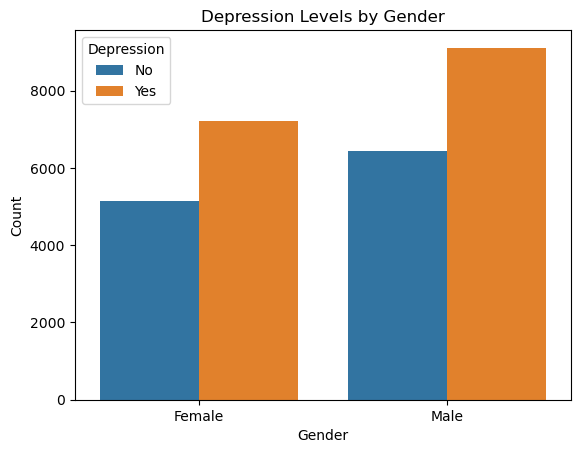

In [13]:
# Bar plot for Gender vs Depression
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Depression Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.xticks(ticks=[1, 0], labels=['Male', 'Female'])
plt.show()

**Conclusion:** The bar plot shows the distribution of depression levels among males and females. If the counts of depression are significantly higher in one gender, it may indicate that gender plays a role in the prevalence of depression among students.

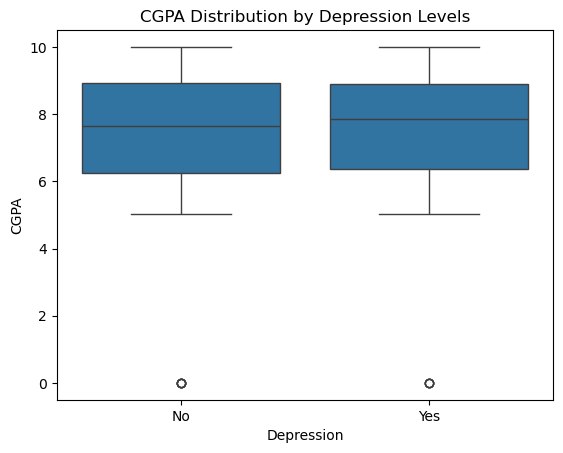

In [14]:
# Box plot for CGPA vs Depression
sns.boxplot(data=df, x='Depression', y='CGPA')
plt.title('CGPA Distribution by Depression Levels')
plt.xlabel('Depression')
plt.ylabel('CGPA')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Conclusion:** The box plot illustrates the distribution of CGPA for students with and without depression. A lower median CGPA for students with depression may suggest that academic performance is negatively impacted by mental health issues.

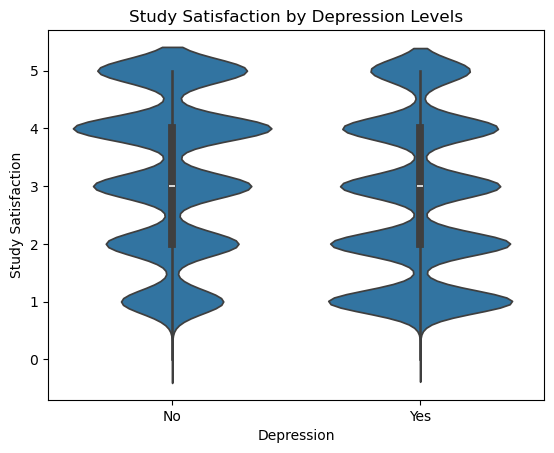

In [15]:
# Violin plot for Study Satisfaction vs Depression
sns.violinplot(data=df, x='Depression', y='Study Satisfaction')
plt.title('Study Satisfaction by Depression Levels')
plt.xlabel('Depression')
plt.ylabel('Study Satisfaction')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Conclusion:** The violin plot shows the distribution of study satisfaction levels among students with and without depression. A wider spread in the depression group may indicate that study satisfaction varies significantly among depressed students.

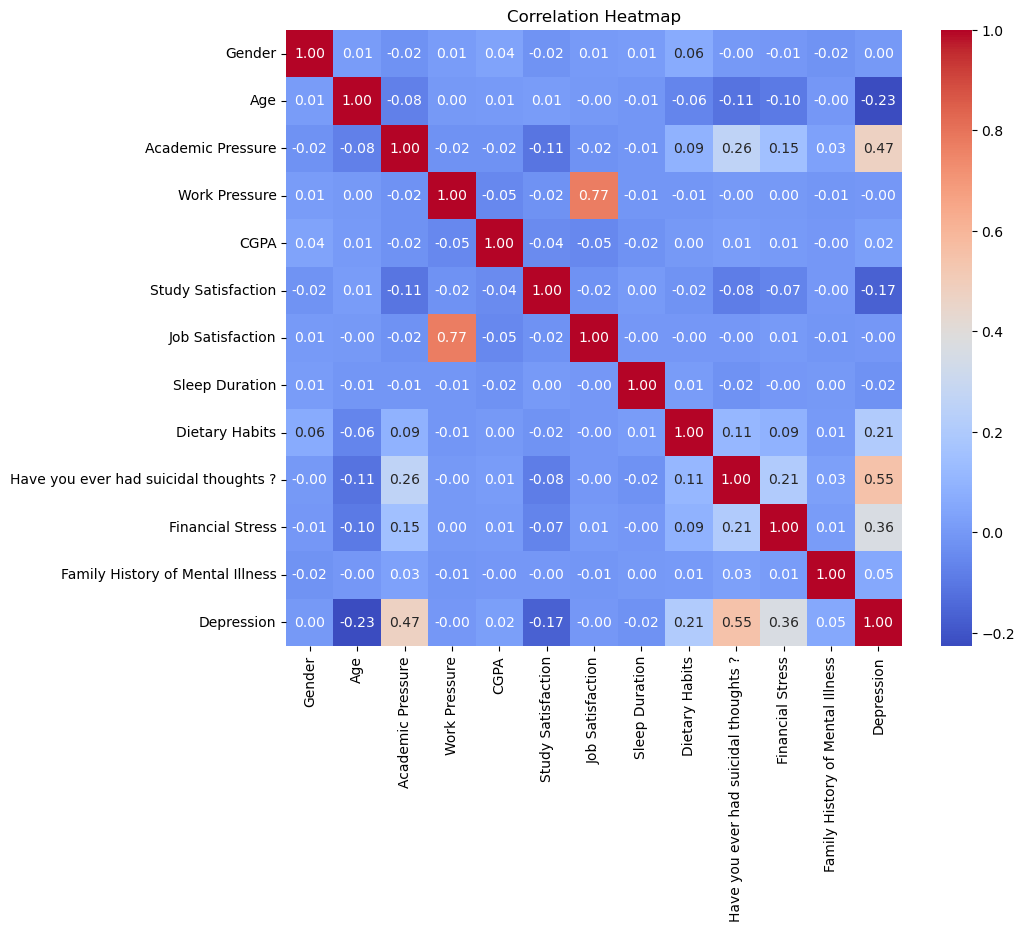

In [16]:
# Correlation heatmap
values=['Gender','Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Sleep Duration','Dietary Habits','Have you ever had suicidal thoughts ?','Financial Stress','Family History of Mental Illness','Depression',
]
plt.figure(figsize=(10, 8))
correlation_matrix = df[values].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

**Conclusion:** The heatmap reveals the correlations between various numerical features in the dataset. Strong correlations between financial stress, academic pressure, and depression suggest that these factors are interrelated and may contribute to mental health issues.

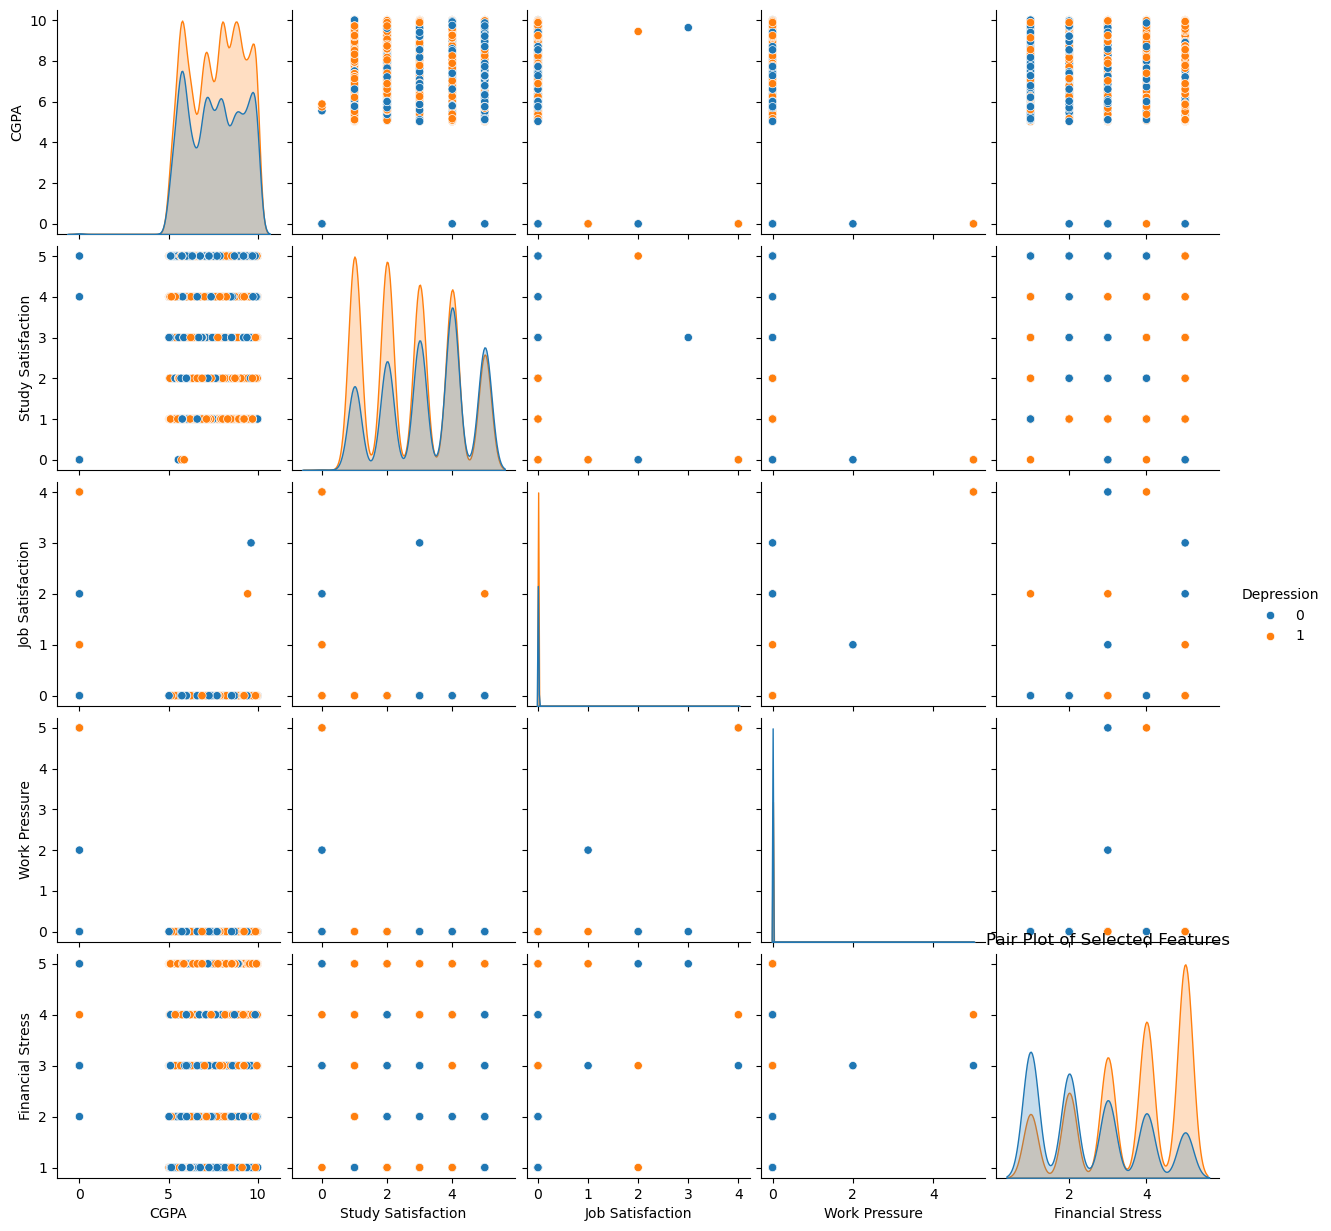

In [17]:
# Pair plot for selected numerical features
sns.pairplot(df, hue='Depression', vars=['CGPA', 'Study Satisfaction','Job Satisfaction', 'Work Pressure', 'Financial Stress'])
plt.title('Pair Plot of Selected Features')
plt.show()

**Conclusion:** The pair plot allows for the visualization of relationships between selected features and depression. It can help identify patterns and clusters, indicating how different factors interact with each other in relation to depression.

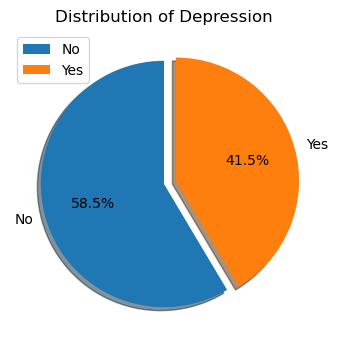

In [18]:
# Pie chart for Depression distribution
depression_counts = df['Depression'].value_counts()

plt.figure(figsize=(6,4))
plt.pie(depression_counts, labels=['No', 'Yes'], shadow=True, autopct='%1.1f%%', startangle=90, explode=(0,0.1))
plt.title('Distribution of Depression')
plt.legend()
plt.show()

**Conclusion:** The pie chart illustrates the distribution of depression among students, revealing a significant proportion of individuals experiencing depression. This highlights the urgent need for enhanced mental health support and resources within educational institutions.

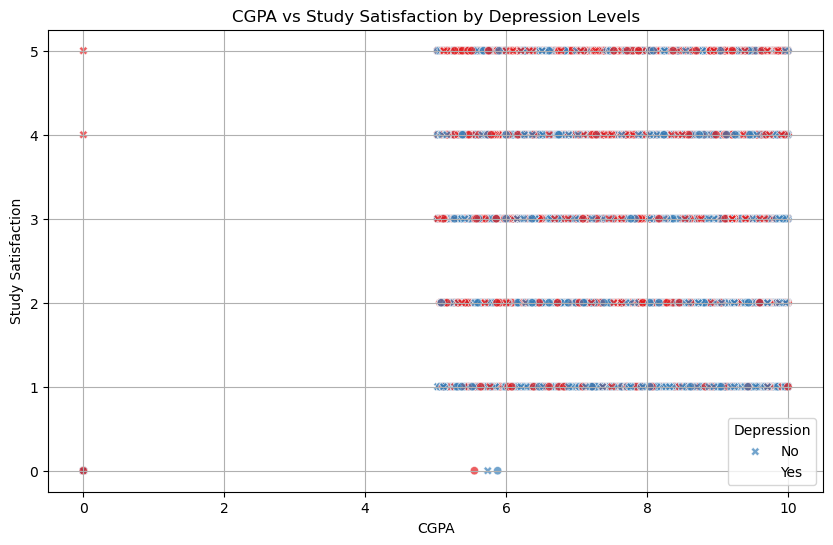

In [19]:
# Scatter plot for CGPA vs Study Satisfaction colored by Depression
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CGPA', y='Study Satisfaction', hue='Depression', style='Gender', palette='Set1', alpha=0.7)
plt.title('CGPA vs Study Satisfaction by Depression Levels')
plt.xlabel('CGPA')
plt.ylabel('Study Satisfaction')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

**Conclusion:** The scatter plot illustrates the relationship between CGPA and Study Satisfaction among students, with points colored by their depression status and differentiated by gender.

# Model Implementations
----------------------

In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
#Define Classification Models
classifier_models={
    'Decision Tree Classifier':DecisionTreeClassifier(criterion='entropy',max_depth=3),
    'Random Forest':RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5),
    'Support Vector Classifier':SVC(kernel='rbf',C=10,gamma=0.5),
    'LogisticRegression':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=5)
       }

# Model Evaluation
------------------

In [23]:
result={}
result_plot={}
for name,model in classifier_models.items():
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    result_plot[name]=acc
    result[name] = {'Accuracy': acc}
    print(f'{name} Accuracy: {acc:.2f}')
    print(confusion_matrix(Y_test,y_pred))

Decision Tree Classifier Accuracy: 0.82
[[1658  686]
 [ 323 2914]]
Random Forest Accuracy: 0.83
[[1710  634]
 [ 305 2932]]
Support Vector Classifier Accuracy: 0.82
[[1742  602]
 [ 428 2809]]
LogisticRegression Accuracy: 0.84
[[1827  517]
 [ 363 2874]]
KNN Accuracy: 0.82
[[1716  628]
 [ 399 2838]]


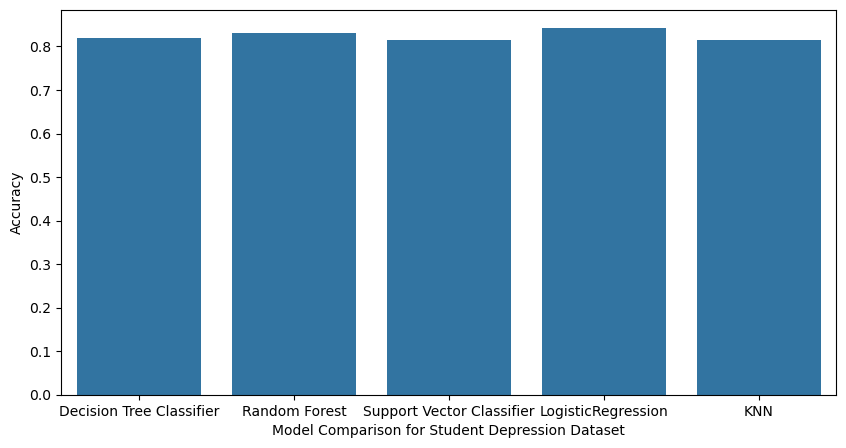

In [24]:
#Compare performance
plt.figure(figsize=(10,5))
sns.barplot(x=list(result_plot.keys()),y=list(result_plot.values()))
plt.ylabel("Accuracy")
plt.xlabel("Model Comparison for Student Depression Dataset")
plt.show()

# Finding The Best Model


In [25]:
# Determine the best fit algorithm
best_model_name = {}
best_model_score = 0

for name in result:
    if result[name]['Accuracy'] > best_model_score:
        best_model_score = result[name]['Accuracy']
        best_model_name = name

print(f'\nThe model with the highest R2_Score is: {best_model_name} with Accuracy: {best_model_score:.2f}')


The model with the highest R2_Score is: LogisticRegression with Accuracy: 0.84


# Conclusion & Interpretation
-----------------------------

The analysis of the student depression dataset highlights significant mental health challenges faced by students, emphasizing the urgent need for mental health resources in educational institutions. A notable proportion of students reported experiencing depression, particularly those under high academic and financial stress. While depression levels were similar across genders, the impact of stressors varied, suggesting the need for targeted interventions.

The positive correlation between CGPA and study satisfaction indicates that academic performance influences satisfaction, but variability suggests other factors also play a role. Unhealthy lifestyles, including poor dietary choices and inadequate sleep, correlate with higher depression levels, underscoring the importance of promoting healthy habits. Additionally, the concerning link between depression and suicidal thoughts highlights the necessity for proactive mental health support.

Overall, a comprehensive approach addressing academic pressures, financial stress, and lifestyle choices is essential for fostering student well-being and success.

**Summary**

The analysis of the student depression dataset highlights the complex and interrelated factors contributing to mental health challenges among students. The insights gained from the visualizations and statistical analyses can guide educational institutions in developing targeted interventions and support systems to enhance student well-being and academic success. Addressing these issues is crucial for fostering a healthier and more supportive educational environment.

**Best Model - Logistic Regression**

**Accuracy - 84%**